# WeatherPy

In [1]:
#Dependencies
import requests
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from citipy import citipy
import sys
import time
sys.path.append("..")


# Import API key
from api_keys import weather_api_key

## Generate Cities List

The aim of this code was to create as much of an even distribution of cities across the globe as possible. The cities datalist is divided into 4 quadrants taking random latitudes and longitutes from the Northern, Southern, Eastern and Western hemispheres. Lists of 150 cities from each quadrant were generated separately. This was done as 90% of the worlds population and land mass exist in the Northern hemisphere so the likelyhood of generating unique Southern hemisphere cities in a single list using the citipy library is reduced.

In [2]:
#geographical coordinates divided into 4 sections to obtain most equal spread of cities, to make the citipy library work faster the latitudes have been capped at the northern and southern most cities in the world to prevent getting too much ocean or uninhabitated land 
lats = [(0,79),(0,79), (-54,0), (-54,0)]
longs = [(0,180),(-180,0),(0,180),(-180,0)]

In [3]:
#function to make lists of unique city/country combinations from above coordinates evenly split across each section
#np.random.uniform is used to ensure selection follows uniform distribution not normal distribution
def makelists(x,listname):
    while len(listname) < 150:
        lat = np.random.uniform(lats[x][0],lats[x][1])  
        lon = np.random.uniform(longs[x][0],longs[x][1])
        city = citipy.nearest_city(lat, lon).city_name
        country = citipy.nearest_city(lat, lon).country_code
        listname.append((city, country))
        listname = sorted(list(set(listname)))
    return(listname)





In [4]:
#create 4 lists of cities using makelists function, to ensure as even a spread across sections as possible
cities = []
for i in range(4):
    name = "city" +str(i)
    listn = []
    listn = makelists(i,listn)
    cities.extend(listn)

    


In [5]:
#splits cities into sets of 50 to ensure max of 60 API calls per second does not interrupt code
citysets = [cities[i:i + 50] for i in range(0, len(cities), 50)]


## Perform API Calls
This requires user to provide own API key in api_keys.py

In [6]:
#API calls on each dictionary
print("Begining of Data Retrieval\n-----------------")
cities2 = []
lat = []
lon = []
maxtemp = []
humidity = []
cloudiness =[]
wind = []
country = []
date = []
i = 1
j = 1
for oneset in citysets:
    start = time.perf_counter()
    for city in oneset:

        url = f"http://api.openweathermap.org/data/2.5/weather?q={city[0]},{city[1]}&units=imperial&appid={weather_api_key}"  
        data = requests.get(url).json()
   
        try:

            lat.append(data["coord"]["lat"])
            lon.append(data["coord"]["lon"])
            maxtemp.append(data["main"]["temp_max"])
            humidity.append(data["main"]["humidity"])
            cloudiness.append(data["clouds"]["all"])
            wind.append(data["wind"]["speed"])
            country.append(data["sys"]["country"])
            date.append(data["dt"])
        except: 
            message = data["message"]
            print(f"{message.capitalize()}. Skipping...")     
        else:
            print(f"Processing Record {i} of Set {j} | {city[0]}")
            cities2.append(city[0])
            
          
            i +=1
    end = time.perf_counter()
    time.sleep(60-(end-start))
    j +=1
    
    
print("-----------------\nData Retrieval Complete \n-----------------")
#creates dictionary of weather data    
citiesdata = {
    'City': cities2,
    'Lat': lat, 
    'Lng': lon, 
    "Max Temp" : maxtemp, 
    "Humidity" : humidity, 
    "Cloudiness" : cloudiness, 
    "Wind Speed": wind, 
    "Country": country,
    "Date" : date
}


Begining of Data Retrieval
-----------------
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 1 | aksu
Processing Record 2 of Set 1 | akyab
Processing Record 3 of Set 1 | along
City not found. Skipping...
Processing Record 4 of Set 1 | amposta
Processing Record 5 of Set 1 | analipsis
Processing Record 6 of Set 1 | atasu
Processing Record 7 of Set 1 | bacungan
Processing Record 8 of Set 1 | bamora
Processing Record 9 of Set 1 | banda aceh
Processing Record 10 of Set 1 | baniyas
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Set 1 | bereznik
Processing Record 12 of Set 1 | bhachau
Processing Record 13 of Set 1 | bilma
Processing Record 14 of Set 1 | bogande
Processing Record 15 of Set 1 | bombay
Processing Record 16 of Set 1 | botou
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | buy
Processing Record 19 of Set 1 | cabatuan
Processing Record 20 of Set 1 | cabesti
City not found. Skipping...
Proc

Processing Record 187 of Set 5 | isla mujeres
Processing Record 188 of Set 5 | ithaca
Processing Record 189 of Set 5 | ixtapa
Processing Record 190 of Set 5 | kahului
Processing Record 191 of Set 5 | kapaa
Processing Record 192 of Set 5 | kayes
Processing Record 193 of Set 5 | kelvington
Processing Record 194 of Set 5 | killarney
Processing Record 195 of Set 5 | killybegs
Processing Record 196 of Set 5 | kirkland lake
Processing Record 197 of Set 5 | kirkwall
Processing Record 198 of Set 5 | klaksvik
Processing Record 199 of Set 5 | kodiak
Processing Record 200 of Set 5 | koutiala
Processing Record 201 of Set 5 | la ronge
Processing Record 202 of Set 5 | lavrentiya
Processing Record 203 of Set 5 | lawton
Processing Record 204 of Set 5 | lincolnwood
Processing Record 205 of Set 5 | liverpool
Processing Record 206 of Set 5 | lompoc
City not found. Skipping...
City not found. Skipping...
Processing Record 207 of Set 5 | makakilo city
Processing Record 208 of Set 5 | mana
Processing Record

Processing Record 374 of Set 9 | oranjemund
City not found. Skipping...
Processing Record 375 of Set 9 | parkes
Processing Record 376 of Set 9 | perth
Processing Record 377 of Set 9 | port alfred
Processing Record 378 of Set 9 | port elizabeth
Processing Record 379 of Set 9 | port hedland
Processing Record 380 of Set 9 | port lincoln
Processing Record 381 of Set 9 | port-gentil
Processing Record 382 of Set 9 | portland
Processing Record 383 of Set 9 | puma
Processing Record 384 of Set 9 | quatre cocos
Processing Record 385 of Set 9 | richards bay
Processing Record 386 of Set 9 | roebourne
Processing Record 387 of Set 9 | russell
Processing Record 388 of Set 9 | saint-denis
Processing Record 389 of Set 9 | saint-paul
Processing Record 390 of Set 9 | saint-philippe
Processing Record 391 of Set 9 | saldanha
Processing Record 392 of Set 9 | saurimo
Processing Record 393 of Set 9 | sehithwa
Processing Record 394 of Set 9 | senanga
Processing Record 395 of Set 9 | souillac
Processing Record 

City not found. Skipping...
Processing Record 550 of Set 12 | valdivia
Processing Record 551 of Set 12 | viedma
Processing Record 552 of Set 12 | vila velha
-----------------
Data Retrieval Complete 
-----------------


## Converts API Data to DataFrame
   


In [7]:
#converts weather dictionary to dataframe removing duplicated city and country pairs
df1 = pd.DataFrame(citiesdata)
initial = len(df1)
df1.drop_duplicates(subset=['City','Country'], keep= 'first', inplace=True)
final = len(df1)

print(f"{initial - final} duplicate city/country pairs were removed")


11 duplicate city/country pairs were removed


In [8]:
#display data frame head
df1.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aksu,41.1231,80.2644,61.48,20,14,7.05,CN,1619407387
1,akyab,20.1500,92.9000,86.02,66,9,5.06,MM,1619407388
2,along,28.1667,94.7667,87.03,29,22,1.19,IN,1619407388
3,amposta,40.7131,0.5810,52.00,90,100,1.01,ES,1619407388
4,analipsis,35.3167,25.5667,57.20,67,20,24.16,GR,1619407389


In [9]:
#calculate and display summary statistic
df1.describe().style.format({'Lat':'{:.2f}','Lng':'{:.2f}','Max Temp':'{:.2f}','Humidity':'{:.2f}','Cloudiness':'{:.2f}', 'Wind Speed':'{:.2f}' ,'Date':"{:.0f}"})


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,541.00,541.00,541.00,541.00,541.00,541.00,541
mean,8.94,3.47,63.41,70.87,50.32,7.19,1619407695
std,33.12,89.57,17.68,22.73,38.76,4.82,238
min,-54.80,-175.20,8.47,7.00,0.00,0.31,1619406835
25%,-17.97,-67.94,52.00,61.00,9.00,3.44,1619407513
50%,0.53,-2.50,65.98,76.00,46.00,5.91,1619407692
75%,38.07,74.55,77.00,88.00,90.00,10.07,1619407874
max,77.48,175.52,94.08,100.00,100.00,32.01,1619408055


 ## Inspects and removes data if humidity is over 100%

In [10]:
#cleans data if humidity is greater than 100%
if df1["Humidity"].max() > 100:
    over100 = (df1[df1["Humidity"]>100]).index
    clean_city_data = df1.drop(over100, inplace = False)
    droppedcities = df1.loc[over100]["City"]
    print(", ".join(droppedcities) + " have been removed as humidity was >100%")
else:
    clean_city_data = df1

#save to csv    
clean_city_data.to_csv("cityweatherdata.csv", encoding = "utf-8", index=False)

## Plotting Data

In [11]:
#gets date of data
date = datetime.fromtimestamp(clean_city_data["Date"].max()).strftime("%d/%m/%y")
date

'26/04/21'

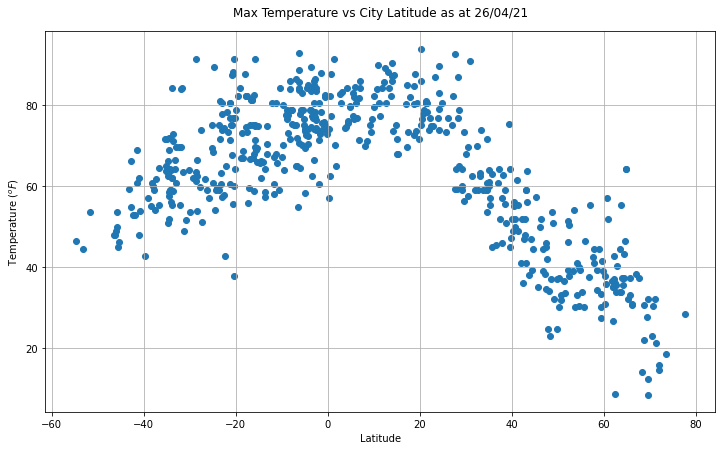

In [12]:
# Temp vs Lat scatter plot
fig= plt.figure(figsize=(12,7))
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")
plt.title(f"Max Temperature vs City Latitude as at {date}", pad=15)
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperaturevCitiesLatitude.png")

# Show plot
plt.show()


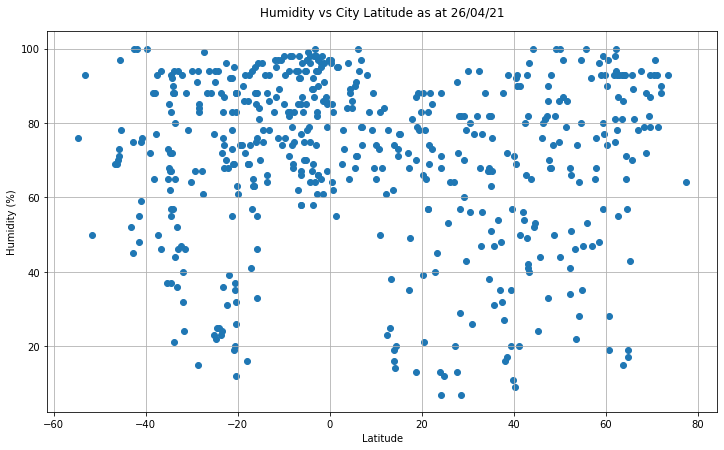

In [13]:
# Humidity vs Lat scatter plot
fig= plt.figure(figsize=(12,7))
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")
plt.title(f"Humidity vs City Latitude as at {date}", pad=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityvCitiesLatitude.png")

# Show plot
plt.show()

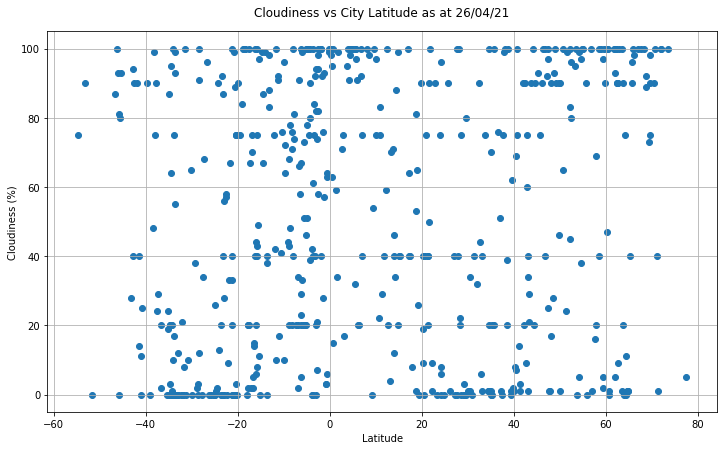

In [14]:
# Cloudiness vs Lat scatter plot
fig= plt.figure(figsize=(12,7))
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")
plt.title(f"Cloudiness vs City Latitude as at {date}", pad=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessvCitiesLatitude.png")

# Show plot
plt.show()

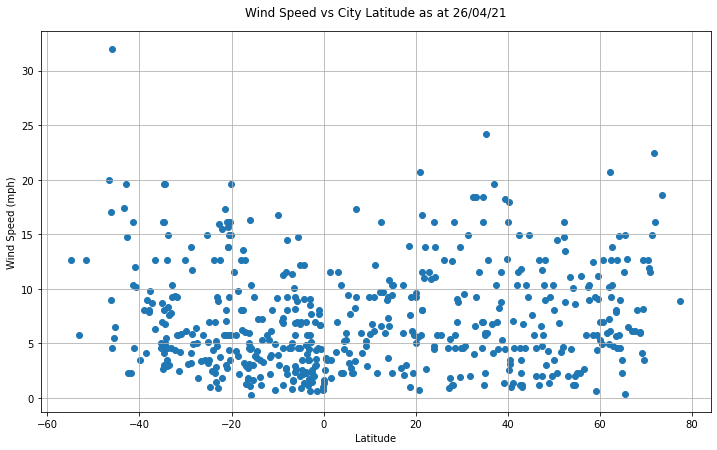

In [15]:
# Wind Speed vs Lat scatter plot
fig= plt.figure(figsize=(12,7))
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")
plt.title(f"Wind Speed vs City Latitude as at {date}", pad=15)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedvCitiesLatitude.png")

# Show plot
plt.show()

## Linear Regressions

In [16]:
#divides dataframes into northern and southern hemisphere cities
northerncities = clean_city_data[clean_city_data["Lat"] >= 0]
southerncities = clean_city_data[clean_city_data["Lat"] < 0]

In [17]:
#shows even distribution of cities in each hemisphere
print(f"Number of cities in Northern Hemisphere dataset: {len(northerncities)}\nNumber of cities in Southern Hemisphere dataset: {len(southerncities)}")

Number of cities in Northern Hemisphere dataset: 274
Number of cities in Southern Hemisphere dataset: 267


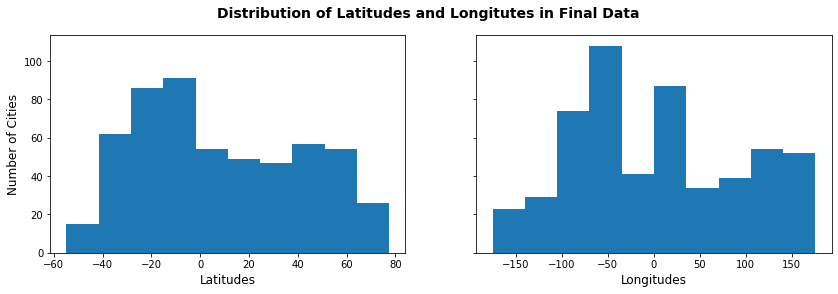

In [18]:
#due to location of land masses the actual lat and long distribution of sampled cities will never be uniform
fig, axs = plt.subplots(1,2, sharey = True, figsize =(14,4))
fig.suptitle("Distribution of Latitudes and Longitutes in Final Data", fontsize=14, fontweight="bold")
axs[0].hist(clean_city_data['Lat'])
axs[0].set_xlabel("Latitudes",fontsize=12)
axs[0].set_ylabel("Number of Cities",fontsize=12)
axs[1].hist(clean_city_data['Lng'])
axs[1].set_xlabel("Longitudes",fontsize=12)

plt.show()


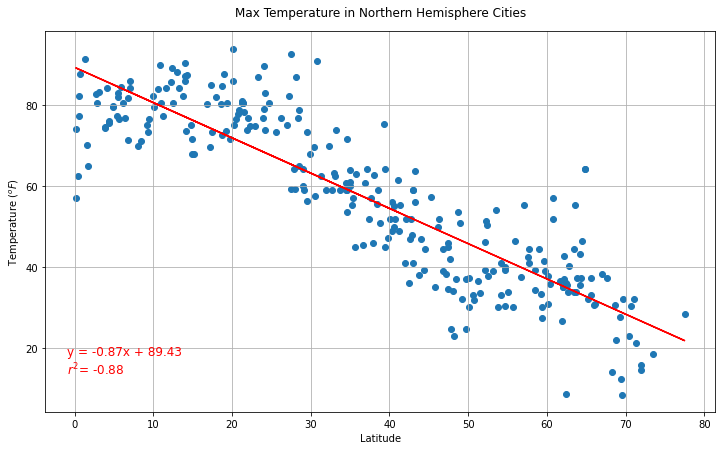

In [19]:
# Linear regression for Northern Hemisphere cities temperature vs latitude
northlat = northerncities['Lat']
northtemp = northerncities['Max Temp']
(ntslope, ntintercept, ntrvalue, ntpvalue, ntstderr) = stats.linregress(northlat, northtemp)
northtempregress = northlat * ntslope + ntintercept
ntline = f"y = {ntslope:.2f}x + {ntintercept:.2f}\n$r^{2}$= {ntrvalue:.2f}" 
fig= plt.figure(figsize=(12,7))
plt.scatter(northlat,northtemp)
plt.plot(northlat,northtempregress,"r-")
plt.figtext(0.15,0.2,ntline,fontsize=12,color="red")
plt.title("Max Temperature in Northern Hemisphere Cities", pad=15)
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthTempvLatRegression.png")
#show plot
plt.show()

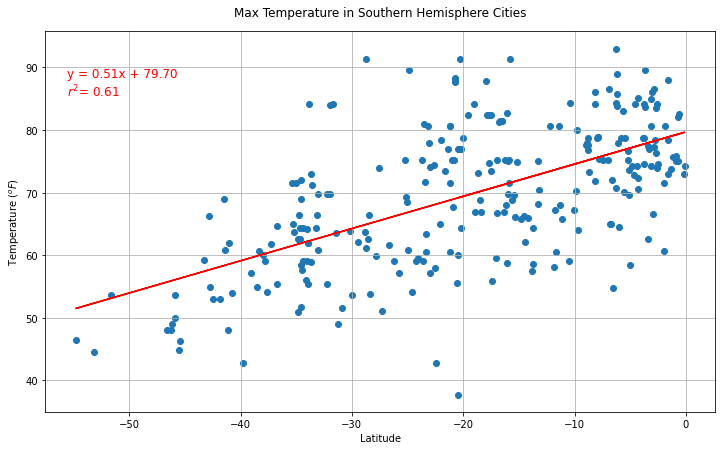

In [20]:
# Linear regression for Southern Hemisphere cities temperature vs latitude
southlat = southerncities['Lat']
southtemp = southerncities['Max Temp']
(stslope, stintercept, strvalue, stpvalue, ststderr) = stats.linregress(southlat, southtemp)
southtempregress = southlat * stslope + stintercept
stline = f"y = {stslope:.2f}x + {stintercept:.2f}\n$r^{2}$= {strvalue:.2f}" 
fig= plt.figure(figsize=(12,7))
plt.scatter(southlat,southtemp)
plt.plot(southlat,southtempregress,"r-")
plt.figtext(0.15,0.75,stline,fontsize=12,color="red")
plt.title("Max Temperature in Southern Hemisphere Cities", pad=15)
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthTempvLatRegression.png")
#show plot
plt.show()

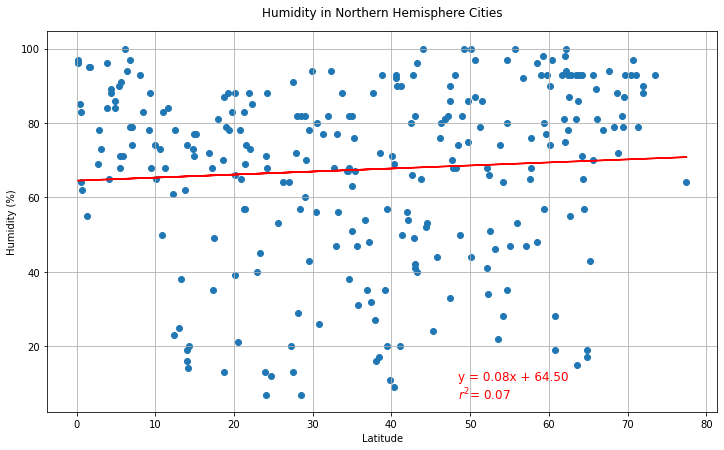

In [21]:
# Linear regression for Northern Hemisphere cities humidity vs latitude
northlat = northerncities['Lat']
northhum = northerncities['Humidity']
(nhslope, nhintercept, nhrvalue, nhpvalue, nhstderr) = stats.linregress(northlat, northhum)
northhumregress = northlat * nhslope + nhintercept
nhline = f"y = {nhslope:.2f}x + {nhintercept:.2f}\n$r^{2}$= {nhrvalue:.2f}" 
fig= plt.figure(figsize=(12,7))
plt.scatter(northlat,northhum)
plt.plot(northlat,northhumregress,"r-")
plt.figtext(0.6,0.15,nhline,fontsize=12,color="red")
plt.title("Humidity in Northern Hemisphere Cities", pad=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthHumidvLatRegression.png")
#show plot
plt.show()

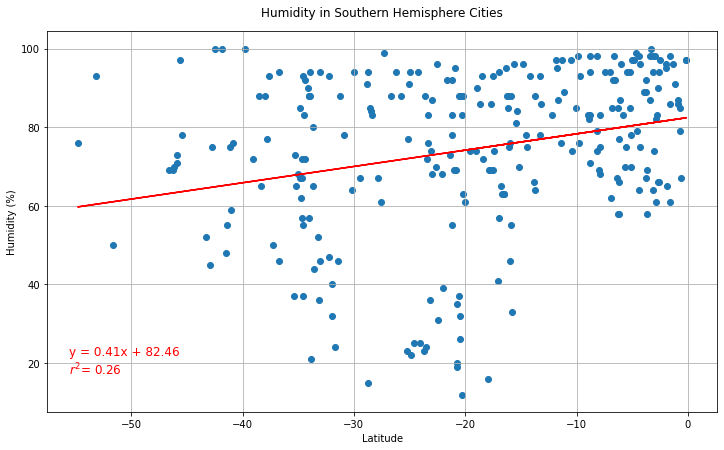

In [22]:
# Linear regression for Southern Hemisphere cities humidity vs latitude
southlat = southerncities['Lat']
southhum = southerncities['Humidity']
(shslope, shintercept, shrvalue, shpvalue, shstderr) = stats.linregress(southlat, southhum)
sorthhumregress = southlat * shslope + shintercept
shline = f"y = {shslope:.2f}x + {shintercept:.2f}\n$r^{2}$= {shrvalue:.2f}" 
fig= plt.figure(figsize=(12,7))
plt.scatter(southlat,southhum)
plt.plot(southlat,sorthhumregress,"r-")
plt.figtext(0.15,0.2,shline,fontsize=12,color="red")
plt.title("Humidity in Southern Hemisphere Cities",pad=15)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthHumidvLatRegression.png")
#show plot
plt.show()

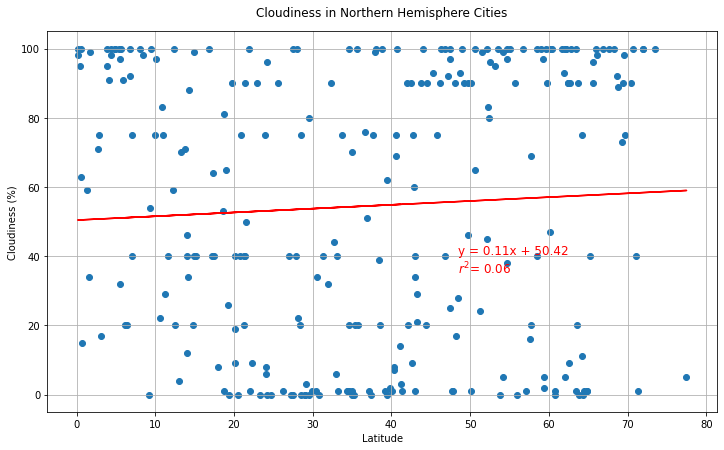

In [23]:
# Linear regression for Northern Hemisphere cities cloudiness vs latitude
northlat = northerncities['Lat']
northcloud = northerncities['Cloudiness']
(ncslope, ncintercept, ncrvalue, ncpvalue, ncstderr) = stats.linregress(northlat, northcloud)
northcloudregress = northlat * ncslope + ncintercept
ncline = f"y = {ncslope:.2f}x + {ncintercept:.2f}\n$r^{2}$= {ncrvalue:.2f}"
fig= plt.figure(figsize=(12,7))
plt.scatter(northlat,northcloud)
plt.plot(northlat,northcloudregress,"r-")
plt.figtext(0.6,0.4,ncline,fontsize=12,color="red")
plt.title("Cloudiness in Northern Hemisphere Cities", pad=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthCloudvLatRegression.png")
#show plot
plt.show()

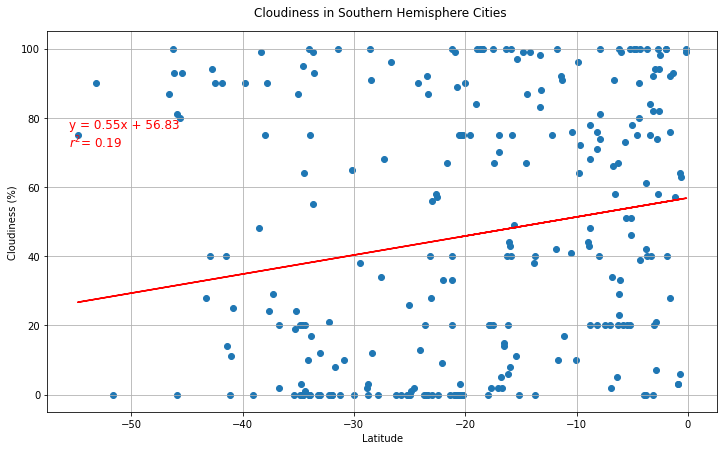

In [24]:
# Linear regression for Southern Hemisphere cities cloudiness vs latitude
southlat = southerncities['Lat']
southcloud = southerncities['Cloudiness']
(scslope, scintercept, scrvalue, scpvalue, scstderr) = stats.linregress(southlat, southcloud)
sorthcloudregress = southlat * scslope + scintercept
scline = f"y = {scslope:.2f}x + {scintercept:.2f}\n$r^{2}$= {scrvalue:.2f}" 
fig= plt.figure(figsize=(12,7))
plt.scatter(southlat,southcloud)
plt.plot(southlat,sorthcloudregress,"r-")
plt.figtext(0.15,0.65,scline,fontsize=12,color="red")
plt.title("Cloudiness in Southern Hemisphere Cities ", pad=15)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthCloudvLatRegression.png")
#show plot
plt.show()

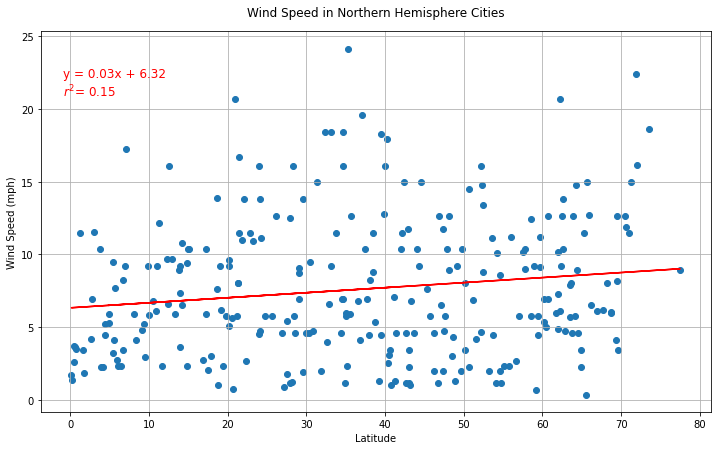

In [25]:
# Linear regression for Northern Hemisphere cities wind speed vs latitude
northlat = northerncities['Lat']
northwind = northerncities['Wind Speed']
(nwslope, nwintercept, nwrvalue, nwpvalue, nwstderr) = stats.linregress(northlat, northwind)
northwindregress = northlat * nwslope + nwintercept
nwline = f"y = {nwslope:.2f}x + {nwintercept:.2f}\n$r^{2}$= {nwrvalue:.2f}" 
fig= plt.figure(figsize=(12,7))
plt.scatter(northlat,northwind)
plt.plot(northlat,northwindregress,"r-")
plt.figtext(0.15,0.75,nwline,fontsize=12,color="red")
plt.title("Wind Speed in Northern Hemisphere Cities",pad=15)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthWindvLatRegression.png")
#show plot
plt.show()

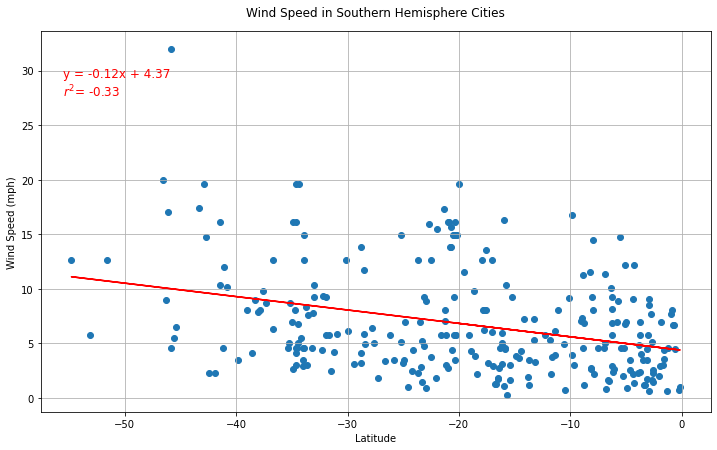

In [26]:
# Linear regression for Southern Hemisphere cities wind speed vs latitude
southlat = southerncities['Lat']
southwind = southerncities['Wind Speed']
(swslope, swintercept, swrvalue, swpvalue, swstderr) = stats.linregress(southlat, southwind)
sorthwindregress = southlat * swslope + swintercept
swline = f"y = {swslope:.2f}x + {swintercept:.2f}\n$r^{2}$= {swrvalue:.2f}" 
fig= plt.figure(figsize=(12,7))
plt.scatter(southlat,southwind)
plt.plot(southlat,sorthwindregress,"r-")
plt.figtext(0.15,0.75,swline,fontsize=12,color="red")
plt.title("Wind Speed in Southern Hemisphere Cities",pad=15)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthWindvLatRegression.png")
#show plot
plt.show()

## Data Observations
1. The maximum temperature peaks between Latitudes 0 and 22. The maximum temperature for the cities in the northern hemisphere had a greater range -2$^o$F to 103$^o$F, which are also the maximum and minimum of the whole data set. The minimum southern hemisphere temperature was 40$^o$F. The lower maximum temperature in the northern hemisphere is due to the tilt of the earth causing the northern hemisphere to be further away from the sun, there are more cities occupying latitudes (0 to 77.48) further away from the equator as there is a greater percentage land mass to occupy (40%). The southern hemisphere has a lower land mass to occupy (20%), and are closer to the equator i.e. between latitudes of 0 to -54.80. These difference would also cause the greater range of temperatures observed in the northern hemisphere. <br/>


2. There was a very strong negative correlation between the latitude and max temperature in northern hemisphere cities, $r^2$ = -0.85. There was also a weaker positive correlation, $r^2$ = 0.61, between the latitude and max temperature in southern hemisphere cities. This means maximum city temperatures decrease as they move further away from the equator. This is supported by the shape of total cities data in the observation above. This observation is due to the sun shining directly at the equator through the earths full orbit around the sun. <br/> 


3. There are minimal observable relationships between latitude and humidity, wind speed and cloudiness. There was also no strong correrlations in the northern and southern hemisphere data trends, no $r^2$ was any higher than 0.3. This could either be due to these parameters having other factors of greater influence that temperature or that the data is based on a single time period and not an examination of several datasets over a year.

### ____ End Of Analysis ____